# Graph Analytics with NetworkX

[Jian Tao](https://coehpc.engr.tamu.edu/people/jian-tao/), Texas A&M University

Sept 10, 2019

Adopted from 

**the NetworkX tutorial**

at https://networkx.github.io/documentation/stable/tutorial.html

In [1]:
%matplotlib inline
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

### Create a graph
By definition, a Graph is a collection of nodes (vertices) along with identified pairs of nodes (called edges, links, etc). In NetworkX, nodes can be any hashable object e.g., a text string, an image, an XML object, another Graph, a customized node object, etc.

NetworkX contains functions to **CRUD (Create, Read, Update, and Delete)** graphs.

In [ ]:
G = nx.Graph()

In [ ]:
G.add_node(1)

In [ ]:
G.add_nodes_from([2,3])

In [ ]:
G.nodes()

In [ ]:
G.add_edge(1,2)

In [ ]:
G.add_edges_from([(1,2),(1,3), (2,3)])

In [ ]:
G.edges()

In [ ]:
nx.draw(G, with_labels=True, node_size=3000, node_color="g", font_size=20)

One can remove nodes and edges from the graph in a similar fashion to adding. Use methods Graph.remove_node(), Graph.remove_nodes_from(), Graph.remove_edge() and Graph.remove_edges_from(), e.g.

In [ ]:
G.remove_node(2)

In [ ]:
G.edges()

In [ ]:
G.number_of_edges() # total number of edges

In [ ]:
G.number_of_nodes() # total number of nodes

In [ ]:
G.degree[1] # the number of edges incident to 1

In [ ]:
G.clear() # removing all nodes and edges

### Accessing edges and neighbors
In addition to the views Graph.edges(), and Graph.adj(), access to edges and neighbors is possible using subscript notation. You can get/set the attributes of an edge using subscript notation if the edge already exists.

### Other built-in graphs from NetworkX
NetworkX contains the generators for some classic graphs.

You can find more information about the Graph Generators at the [NetworkX documentation](https://networkx.github.io/documentation/latest/reference/generators.html) page.

In [ ]:
G = nx.complete_graph(5)
nx.draw(G)

In [ ]:
G = nx.cycle_graph(10)
nx.draw(G)

In [ ]:
G = nx.lollipop_graph(5, 8)
nx.draw(G)

In [ ]:
G = nx.path_graph(10)
nx.draw(G)

In [ ]:
G = nx.star_graph(10)
nx.draw(G)

In [ ]:
G = nx.wheel_graph(10)
nx.draw(G)

In [ ]:
G = nx.ladder_graph(10)
nx.draw(G)

In [ ]:
G = nx.balanced_tree(5, 2)
nx.draw(G)

In [ ]:
G = nx.barbell_graph(5, 2)
nx.draw(G)

NetworkX also provides functions for generating grid graphs and lattices.

/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:563: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):
/usr/local/lib/python3.7/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: 
The is_numlike function was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use isinstance(..., numbers.Number) instead.
  if cb.is_numlike(alpha):


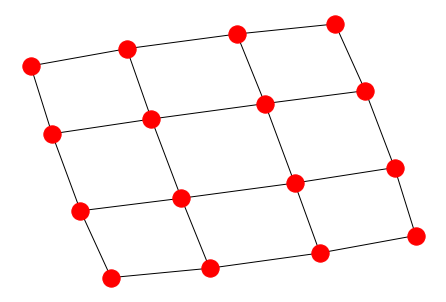

In [2]:
G = nx.grid_2d_graph(4,4)
nx.draw(G)

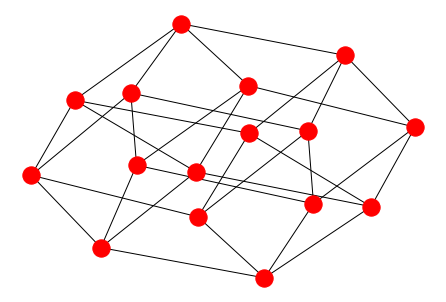

In [3]:
G = nx.hypercube_graph(4)
nx.draw(G)

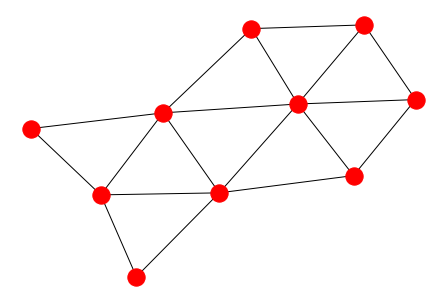

In [4]:
G = nx.triangular_lattice_graph(3, 3)
nx.draw(G)

NetworkX also can generate many small pre-defined graphs and random graphs

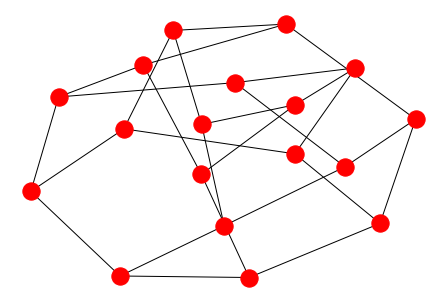

In [5]:
G = nx.pappus_graph()
nx.draw(G)

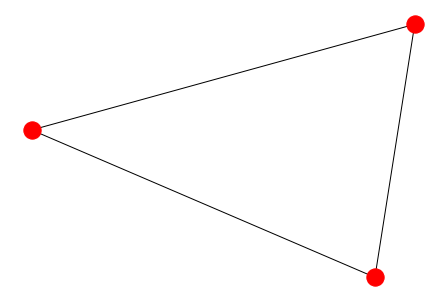

In [6]:
G = nx.gnm_random_graph(3, 4)
nx.draw(G)

### Social Networks
NetworkX provides some famous social networks.

Zachary's karate club is a social network of a university karate club, described in the paper "An Information Flow Model for Conflict and Fission in Small Groups" by Wayne W. Zachary. The network became a popular example of community structure in networks after its use by Michelle Girvan and Mark Newman in 2002. [Wikipedia Entry](https://en.wikipedia.org/wiki/Zachary%27s_karate_club)

The standard 78-edge network data set for Zachary's karate club is publicly available on the internet.[3] The data can be summarized as list of integer pairs. Each integer represents one karate club member and a pair indicates the two members interacted. The data set is summarized below and also in the adjoining image. Node 1 stands for the instructor, node 34 for the club administrator / president.

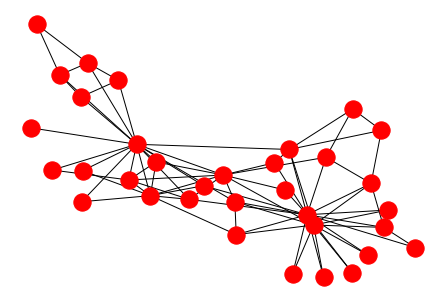

In [7]:
G = nx.karate_club_graph()
nx.draw(G) # Zachary’s Karate Club graph.

In [ ]:
def mydraw(G, measures, measure_name):
    pos = nx.spring_layout(G)
    plt.figure(figsize=(12,12)) 
    nodes = nx.draw_networkx_nodes(G, pos, node_size=500, cmap=plt.cm.plasma, 
                                   node_color=list(measures.values()),
                                   nodelist=list(measures.keys()))
    nodes.set_norm(mcolors.SymLogNorm(linthresh=0.1, linscale=1))
    
    labels = nx.draw_networkx_labels(G, pos)
    edges = nx.draw_networkx_edges(G, pos)
    plt.title(measure_name)
    plt.colorbar(nodes)
    plt.axis('off')
    plt.show()

### Graph Analytics Concetps

In [ ]:
plt.figure(figsize=(12,12)) 
G = nx.karate_club_graph()
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True) # Zachary’s Karate Club graph.

In [ ]:
measure = nx.degree_centrality(G)
mydraw(G, measure, 'Degree Centrality')

In [ ]:
measure = nx.betweenness_centrality(G)
mydraw(G, measure, 'Betweenness Centrality')

In [ ]:
measure = nx.closeness_centrality(G)
mydraw(G, measure, 'Closeness Centrality')

### Density

Density measures how many edges a Graph has. The density for undirected graphs is 
    $$d = \frac{2m}{n(n-1)}$$
    and for directed graphs is
    $$d = \frac{m}{n(n-1)},$$
    where `n` is the number of nodes and `m`  is the number of edges in `G`.


In [ ]:
nx.density(G)

### Average Shortest Path Length
It is a concept in network topology that is defined as the average number of steps along the shortest paths for all possible pairs of network nodes. It is a measure of the efficiency of information or mass transport on a network.


In [ ]:
nx.average_shortest_path_length(G)

### Efficiency
nx.efficiency (G, u, v) returns the efficiency of a pair of nodes (u, v) in a graph G.

In [ ]:
nx.efficiency(G, 0,32)

### Average Degree Connectivity
For a node of degree k - What is the average of its neighbours' degree?

In [ ]:
nx.average_degree_connectivity(G)

### Path Exploration
Find all the paths available

In [ ]:
for p in nx.all_simple_paths(G, source=11, target=0):
    print (p)

### Dijkstra /ˈdaɪkstrə/ Shortest Path
Dijkstra's algorithm (or Dijkstra's Shortest Path First algorithm, SPF algorithm) is an algorithm for finding the shortest paths between nodes in a graph, which may represent, for example, road networks. It was conceived by computer scientist Edsger W. Dijkstra in 1956 and published three years later.


In [ ]:
nx.dijkstra_path(G, source=1, target=27)

In [ ]:
nx.shortest_path(G, source=1, target=27)

In [ ]:
nx.shortest_path_length(G, source=1, target=27)

### Depth First Search
Basic algorithms for depth-first searching.
Based on http://www.ics.uci.edu/~eppstein/PADS/DFS.py by D. Eppstein, July 2004.

In [ ]:
plt.figure(figsize=(12,12)) 
nx.draw(G, pos, with_labels=True)

In [ ]:
plt.figure(figsize=(12,12)) 
nx.draw(nx.dfs_tree(G, 0), pos, with_labels=True)

### Breadth First Search
Basic algorithms for breadth-first searching.

In [ ]:
plt.figure(figsize=(12,12))
nx.draw(nx.bfs_tree(G, 0), pos, with_labels=True)